In [3]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

### Example: Independence

We start today with an example of a joint distribution:

$$ f(y_1, y_2) = \frac{1}{2\pi} e^{-y_1^2 - y_2^2} $$

Show that $Y_1$ and $Y_2$ with this density will be independent.


### Example: Dependence

Now consider 

$$ f(y_1, y_2) = C e^{-y_1^2 - y_2^2 - 1.25 y_1 y_2 }  $$

Compute (approximately) the value of C needed to make this a valid density function and then show that $Y_1$ and $Y_2$ with this density are dependent.



### Example: Dependent Variables Expected Value

Compute the expected value of $Y_1 Y_2$ for the density function $f(y_1, y_2)$ above.

### Example: Independent Variables Expected Value

Note that in the case of indepedent variables: $f(y_1, y_2) = f_1(y_1) f_2(y_2)$ show that $$ E( Y_1 Y_2) = E(Y_1) E(Y_2)$$

More generally for independent variables:

$$ E( g(Y_1) h(Y_2) ) = E( g(Y_1) ) E( h(Y_2) ) $$

# Sampling Dependent Random Variables

Note that sampling independent random variables is easy, we just sample each one separately.

Sampling dependent random variables is a hard problem (that is not completely solved at this point - there is research for YOU to do here!!!!)

We'll see today what is called the **Metropolis Algorithm** which does a resonably good job and runs fast enough.



In [4]:
f = lambda y1, y2: np.exp(-y1**2 - y2**2 - 1.25 *y1 *y2 )
C = integrate.dblquad(f, -20, 20, lambda x2: -20, lambda x2: 20)[0]
C

4.02445945301314

In [5]:
f = lambda y1, y2: np.exp(-y1**2 -y2**2 - 1.25 *y1 *y2)/C

In [6]:
# let's plot this density function first

delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
xx1, xx2 = np.meshgrid(x1, x2)
n1, n2 = xx1.shape

ZZ = []
for k1 in range(n1):
    temp = []
    for k2 in range(n2):
        temp += [ f(xx1[k1, k2], xx2[k1, k2]) ]
    ZZ += [temp ]

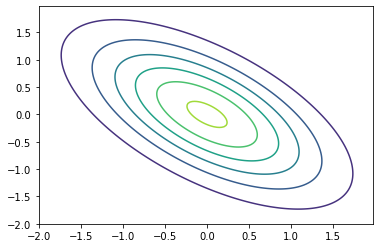

In [7]:
plt.contour(xx1, xx2, ZZ)

Our goal would be to produce a sequence of values whose distribution will match this one.

The metropolis algorithm does the following. Starting from the previous values we found, we choose a prospective new pair of values for our random variables from a normal distribution with independent normal distributions with means at the previous values and variances 1. 

We then compute the ratio between the density at the prospective values and the density at the previous values.

We then choose a random number from the uniform distribution on $[0, 1]$. If this number is less than the ratio above, then we accept the prospective values as our next values in the sample. Otherwise, we reject the prospective value and go back to selecting one.

In [18]:
sample = [ np.random.standard_normal(2) ]
# We choose a random pair of numbers as our initial value

# Note be careful here, if our initial seed is bad or if our variance 
# for the prospective values is to high this thing could run a long time
#
# I generally try to avoid while loops, but in this case we want to make sure we get
# a full size sample.
while len(sample) < 10000:
    
    xstar = np.random.standard_normal(2)*1 + sample[-1]
    alpha = f(xstar[0], xstar[1]) / f(sample[-1][0], sample[-1][1] )
    
    if np.random.rand() < alpha:
        sample += [ xstar ]

The problem is that in this process the values close to each other in our sample are dependent on each other. One way to avoid this is to prune the sample by taking only every few members and not using sequences. 

Another problem is that the first few members of the sample are dependent on our initial seed. We can avoid this by discarding the an initial portion of the sample.

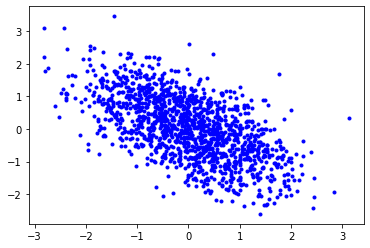

In [19]:
xx = [ sample[5*k][0] for k in range(600, len(sample)//5 )  ]
yy = [ sample[5*k][1] for k in range(600, len(sample)//5 ) ]

plt.plot(xx, yy, 'b.')